In [9]:
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from cartopy import crs as ccrs # Cartography library
import numpy as np
import seaborn as sns
import geopy.distance
import scipy.stats as stats
import cmocean

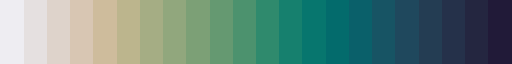

In [49]:
discrete_cmap = ListedColormap(cmocean.cm.rain(np.linspace(0, 1, 22)))
discrete_IWV_cmap = discrete_cmap.copy()
discrete_IWV_cmap.set_under(color='red') #set values below vmin to white
#discrete_IWV_cmap.set_bad(color='white') #set missing (NaN) values to white
discrete_IWV_cmap

# Read data

In [11]:
#Open ship data
DSHIP = xr.open_dataset('../../data/meteor_meteo_dship_20240923.nc')
#CID: QmSSrT1UdtocfQS5yWSHFEJwJjqcNXjq2F1QfvNgLuEqSN
#DSHIP= xr.open_dataset('ipns://latest.orcestra-campaign.org/products/METEOR/DShip.zarr',engine='zarr')
DSHIP

<xarray.Dataset> Size: 20MB
Dimensions:           (time: 58980)
Coordinates:
  * time              (time) datetime64[ns] 472kB 2024-08-14 ... 2024-09-23T2...
    lat               (time) float64 472kB ...
    lon               (time) float64 472kB ...
Data variables: (12/39)
    sst_port          (time) float64 472kB ...
    sst_extern_port   (time) float64 472kB ...
    sst_intern_port   (time) float64 472kB ...
    sst_board         (time) float64 472kB ...
    sst_extern_board  (time) float64 472kB ...
    sst_intern_board  (time) float64 472kB ...
    ...                ...
    ship_heave        (time) float64 472kB ...
    ship_heave_std    (time) float64 472kB ...
    ship_pitch        (time) float64 472kB ...
    ship_pitch_std    (time) float64 472kB ...
    ship_roll         (time) float64 472kB ...
    ship_roll_std     (time) float64 472kB ...

In [12]:
IWV = xr.open_dataset('../../data/IWVprecip_alongtrack.nc')
IWV

<xarray.Dataset> Size: 67kB
Dimensions:                  (time: 927, time_sonde: 308)
Coordinates:
  * time                     (time) datetime64[ns] 7kB 2024-08-16T08:00:00 .....
  * time_sonde               (time_sonde) datetime64[ns] 2kB 2024-08-14T21:00...
Data variables:
    PW_alongtrack_mimic      (time) float64 7kB ...
    PW_alongtrack_era5       (time) float64 7kB ...
    PW_alongsondes_mimic     (time_sonde) float64 2kB ...
    PW_alongsondes_era5      (time_sonde) float64 2kB ...
    PW_sondes                (time_sonde) float64 2kB ...
    precip_alongtrack_imerg  (time) float64 7kB ...
    precip_alongtrack_era5   (time) float64 7kB ...
    latitude                 (time) float64 7kB ...
    longitude                (time) float64 7kB ...
    latitude_sonde           (time_sonde) float64 2kB ...
    longitude_sonde          (time_sonde) float64 2kB ...
Attributes:
    title:    Column-Integrated Water Vapor and Precipitation from RV Meteor ...
    source:   IEMRG, MIMIC-TPW, ERA5, and Meteor Radiosondes (Vaisala RS41-SGP)
    history:  Created 2025-05-26 by Allison Wing
    notes:    Data from IMERG, MIMIC-TPW and ERA5 interpolated to ship track ...

Plot ship track colored by a variable

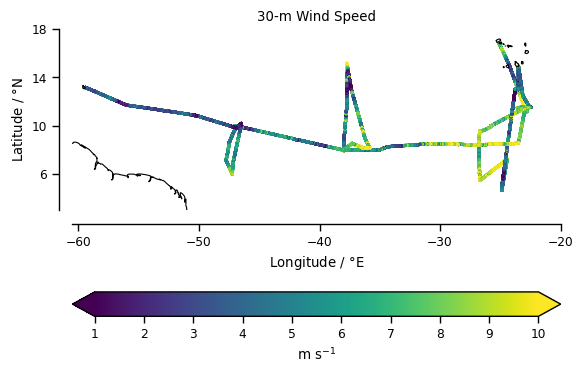

In [48]:
sns.set_context("paper")
fig = plt.figure(figsize=(16/2.54,18/2.54))
ax_cbar = fig.add_axes([0.3 , 0.52, 0.4, 0.02])
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.set_extent([-60.5, -20, 3, 18], crs=ccrs.PlateCarree())
cb_plot = plt.scatter(DSHIP.lon, DSHIP.lat, s=2,c=DSHIP.wspd,cmap='viridis',vmin=1,vmax=10)
ax.spines.geo.set_visible(False)
ax.coastlines(alpha=1.0)
ax.set_yticks(np.arange(6,19,4))
ax.set_xticks(np.arange(-60,-19,10))
ax.set_ylabel(r"Latitude / $\degree$N")
ax.set_xlabel(r"Longitude / $\degree$E")
sns.despine(offset=10,ax=ax)
ax.set_title('30-m Wind Speed')

cb1 = plt.colorbar(cb_plot,extend='both',orientation='horizontal')
cb1.set_label('m s$^{-1}$')
#cb1.set_ticks([-6,0,6])

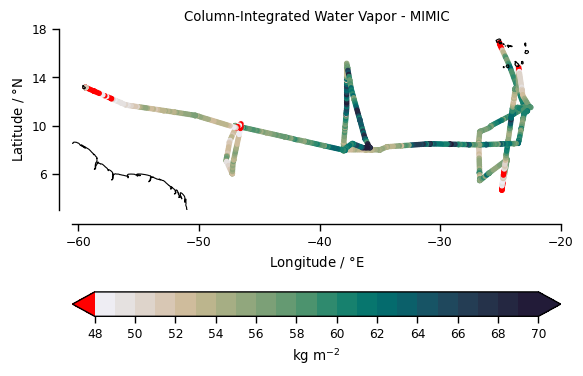

In [52]:
sns.set_context("paper")
fig = plt.figure(figsize=(16/2.54,18/2.54))
ax_cbar = fig.add_axes([0.3 , 0.52, 0.4, 0.02])
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.set_extent([-60.5, -20, 3, 18], crs=ccrs.PlateCarree())
cb_plot = plt.scatter(IWV.longitude, IWV.latitude, s=10,c=IWV.PW_alongtrack_mimic,cmap=discrete_IWV_cmap,vmin=48,vmax=70)
ax.spines.geo.set_visible(False)
ax.coastlines(alpha=1.0)
ax.set_yticks(np.arange(6,19,4))
ax.set_xticks(np.arange(-60,-19,10))
ax.set_ylabel(r"Latitude / $\degree$N")
ax.set_xlabel(r"Longitude / $\degree$E")
sns.despine(offset=10,ax=ax)
ax.set_title('Column-Integrated Water Vapor - MIMIC')

cb1 = plt.colorbar(cb_plot,extend='both',orientation='horizontal')
cb1.set_label('kg m$^{-2}$')
cb1.set_ticks(np.arange(48,71,2))

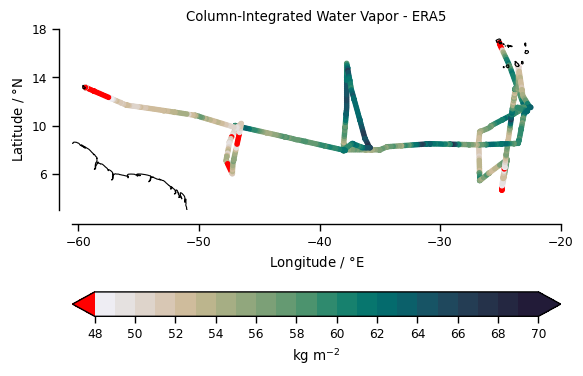

In [51]:
sns.set_context("paper")
fig = plt.figure(figsize=(16/2.54,18/2.54))
ax_cbar = fig.add_axes([0.3 , 0.52, 0.4, 0.02])
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.set_extent([-60.5, -20, 3, 18], crs=ccrs.PlateCarree())
cb_plot = plt.scatter(IWV.longitude, IWV.latitude, s=10,c=IWV.PW_alongtrack_era5,cmap=discrete_IWV_cmap,vmin=48,vmax=70)
ax.spines.geo.set_visible(False)
ax.coastlines(alpha=1.0)
ax.set_yticks(np.arange(6,19,4))
ax.set_xticks(np.arange(-60,-19,10))
ax.set_ylabel(r"Latitude / $\degree$N")
ax.set_xlabel(r"Longitude / $\degree$E")
sns.despine(offset=10,ax=ax)
ax.set_title('Column-Integrated Water Vapor - ERA5')

cb1 = plt.colorbar(cb_plot,extend='both',orientation='horizontal')
cb1.set_label('kg m$^{-2}$')
cb1.set_ticks(np.arange(48,71,2))

In [15]:
np.nanmin(IWV.PW_sondes)

np.float64(45.05523134966144)

In [27]:
np.nanmax(IWV.PW_sondes)

np.float64(70.3640955438456)

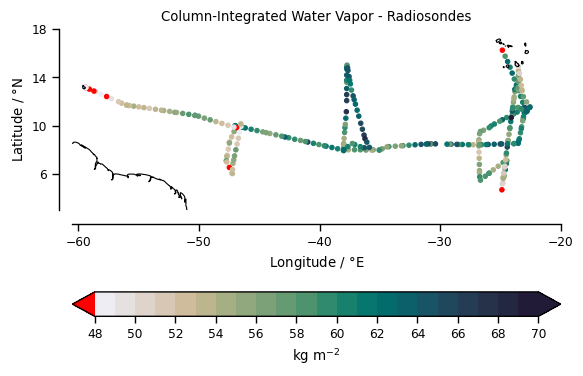

In [50]:
sns.set_context("paper")
fig = plt.figure(figsize=(16/2.54,18/2.54))
ax_cbar = fig.add_axes([0.3 , 0.52, 0.4, 0.02])
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.set_extent([-60.5, -20, 3, 18], crs=ccrs.PlateCarree())
cb_plot = plt.scatter(IWV.longitude_sonde, IWV.latitude_sonde, s=10,c=IWV.PW_sondes,cmap=discrete_IWV_cmap,vmin=48,vmax=70)
ax.spines.geo.set_visible(False)
ax.coastlines(alpha=1.0)
ax.set_yticks(np.arange(6,19,4))
ax.set_xticks(np.arange(-60,-19,10))
ax.set_ylabel(r"Latitude / $\degree$N")
ax.set_xlabel(r"Longitude / $\degree$E")
sns.despine(offset=10,ax=ax)
ax.set_title('Column-Integrated Water Vapor - Radiosondes')

cb1 = plt.colorbar(cb_plot,extend='both',orientation='horizontal')
cb1.set_label('kg m$^{-2}$')
cb1.set_ticks(np.arange(48,71,2))